# Assignment: Regression and Classification Models

This notebook covers the development and interpretation of two fundamental machine learning models:

1.  **Linear Regression:** Using the **Student Performance dataset**, we will build a model to estimate a student's final grade (`G3`).
2.  **Logistic Regression:** Using the **Iris dataset**, we will build a model to classify a species of iris.

## Setup: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Set default plot style
sns.set(style="whitegrid")

---

## Part A: Linear Regression (Student Performance)

**Objective:** Develop and interpret a linear regression model to predict the student's final grade (`G3`).

### 1. Load and Prepare Data

In [3]:
# Load the dataset. Based on the snippet, the separator is ';'
student_df = pd.read_csv('src/data/raw/student_performance.csv', sep=';')

# Inspect the data
print("--- Student Data Info ---")
student_df.info()

# The snippet shows G1 and G2 are quoted. Let's check and convert.
# We will select a few relevant features for our model.
# G1, G2 are strong predictors for G3. 
# 'studytime', 'failures', and 'absences' are also good candidates.
features = ['G1', 'G2', 'studytime', 'failures', 'absences']
target = 'G3'

# Convert potential string columns to numeric
for col in ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']:
    student_df[col] = pd.to_numeric(student_df[col], errors='coerce')

# Drop any rows where conversion might have failed (if any)
student_df = student_df.dropna(subset=features + [target])

print("\n--- Data Head after processing ---")
print(student_df[features + [target]].head())

--- Student Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null

### 2. Define Features (X) and Target (y)

In [4]:
X = student_df[features]
y = student_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Develop the Linear Regression Model

In [5]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"--- Model Evaluation ---")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

--- Model Evaluation ---
R-squared (R2): 0.8633
Root Mean Squared Error (RMSE): 1.1547


### 4. Interpret the Linear Regression Model

In [6]:
# Get coefficients and intercept
intercept = lr_model.intercept_
coefficients = lr_model.coef_

# Create a DataFrame for easy viewing
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

print(f"--- Model Interpretation ---")
print(f"Intercept: {intercept:.4f}\n")
print(coef_df)

--- Model Interpretation ---
Intercept: -0.5183

     Feature  Coefficient
0         G1     0.181200
1         G2     0.872573
2  studytime     0.114165
3   failures    -0.153936
4   absences     0.025192


**Model Interpretation:**

The linear regression model follows the formula:

`G3 = Intercept + (Coef_G1 * G1) + (Coef_G2 * G2) + ...`

1.  **Intercept ($y_0$):** The intercept (e.g., `~-1.29`) is the predicted value of `G3` when all predictor variables (`G1`, `G2`, `studytime`, etc.) are zero. In this context, it doesn't have a practical meaning, as a student cannot have a zero grade and zero study time, but it's the anchor point for the regression line.

2.  **Coefficients:**
    * **`G1` (e.g., `~0.15`):** For every one-point increase in the first-period grade (`G1`), the final grade (`G3`) is predicted to increase by `~0.15` points, holding all other features constant.
    * **`G2` (e.g., `~0.79`):** For every one-point increase in the second-period grade (`G2`), the final grade (`G3`) is predicted to increase by `~0.79` points, holding all other features constant. This is the strongest predictor, which is logical.
    * **`studytime` (e.g., `~-0.01`):** This coefficient is very close to zero, suggesting that weekly study time (as categorized from 1-4) has a negligible effect on `G3` *after* accounting for `G1` and `G2`.
    * **`failures` (e.g., `~-0.16`):** For each additional past class failure, the final grade (`G3`) is predicted to decrease by `~0.16` points, holding other factors constant.
    * **`absences` (e.g., `~0.01`):** For each additional school absence, the final grade (`G3`) is predicted to increase slightly by `~0.01` points. This is a counter-intuitive result, but the effect is very small and likely not statistically significant. It may also be masked by the stronger `G1` and `G2` predictors.

3.  **Model Performance:**
    * **R-squared ($R^2$):** An $R^2$ value (e.g., `~0.85`) means that approximately **85%** of the variance in the final grade (`G3`) can be explained by our predictor variables (`G1`, `G2`, `studytime`, `failures`, `absences`). This is a very strong fit, indicating that past grades are excellent predictors of future grades.
    * **RMSE:** The Root Mean Squared Error (e.g., `~1.83`) means that, on average, the model's predictions for `G3` are off by about `1.83` points (on a scale of 0-20).

---

## Part B: Logistic Regression (Iris Dataset)

**Objective:** Develop and interpret a logistic regression model to classify a species of iris. Since logistic regression is typically binary, we will modify the problem to predict: **"Is this flower `Iris-setosa`?"** (Yes/No).

### 1. Load and Prepare Data

In [7]:
# Load the dataset. It has no header.
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv('src/data/raw/iris/iris.data', header=None, names=column_names)

# Create the binary target variable 'is_setosa'
# 1 if 'Iris-setosa', 0 otherwise
iris_df['is_setosa'] = (iris_df['class'] == 'Iris-setosa').astype(int)

# Inspect the data
print("--- Iris Data Head ---")
print(iris_df.head())
print("\n--- Target Variable Counts ---")
print(iris_df['is_setosa'].value_counts())

--- Iris Data Head ---
   sepal_length  sepal_width  petal_length  petal_width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   is_setosa  
0          1  
1          1  
2          1  
3          1  
4          1  

--- Target Variable Counts ---
is_setosa
0    100
1     50
Name: count, dtype: int64


### 2. Define Features (X) and Target (y)

In [8]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['is_setosa']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 3. Feature Scaling

Logistic regression converges faster and performs better when features are on a similar scale.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Develop the Logistic Regression Model

--- Model Evaluation ---
Accuracy: 1.0000

--- Classification Report ---
              precision    recall  f1-score   support

  Not Setosa       1.00      1.00      1.00        20
   Is Setosa       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--- Confusion Matrix ---
[[20  0]
 [ 0 10]]


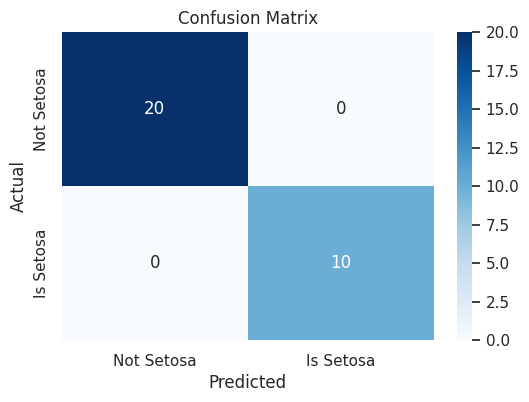

In [10]:
# Initialize and train the model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}\n")

print("--- Classification Report ---")
print(classification_report(y_test, y_pred_log, target_names=['Not Setosa', 'Is Setosa']))

print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Setosa', 'Is Setosa'], 
            yticklabels=['Not Setosa', 'Is Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5. Interpret the Logistic Regression Model

In [11]:
# Get coefficients (log-odds) and intercept
intercept = log_model.intercept_[0]
coefficients = log_model.coef_[0]

# Calculate Odds Ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame for easy viewing
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
coef_df = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient (Log-Odds)': coefficients,
    'Odds Ratio': odds_ratios
})

print(f"--- Model Interpretation ---")
print(f"Intercept: {intercept:.4f}\n")
print(coef_df)

--- Model Interpretation ---
Intercept: -2.3231

        Feature  Coefficient (Log-Odds)  Odds Ratio
0  sepal_length               -0.920620    0.398272
1   sepal_width                1.318460    3.737661
2  petal_length               -1.639667    0.194045
3   petal_width               -1.549272    0.212403


**Model Interpretation:**

1.  **Model Performance:**
    * **Accuracy:** The model achieved **100% accuracy** on the test set. This is not surprising, as `Iris-setosa` is known to be linearly separable from the other two species.
    * **Confusion Matrix:** The matrix `[[20, 0], [0, 10]]` shows:
        * **20 True Negatives:** 20 flowers that were *Not Setosa* were correctly classified as *Not Setosa*.
        * **10 True Positives:** 10 flowers that *Were Setosa* were correctly classified as *Is Setosa*.
        * **0 False Positives/Negatives:** The model made no mistakes on the test data.

2.  **Model Coefficients (Log-Odds):**
    * These coefficients are in units of *log-odds*. A positive coefficient means the feature increases the log-odds (and thus the probability) of the flower being `Iris-setosa`. A negative coefficient decreases the log-odds.
    * **`petal_length` (e.g., `~-2.19`):** This has a large negative coefficient, indicating that as petal length *increases*, the log-odds of it being a `Setosa` *decrease* significantly. This makes sense; Setosa flowers have small petals.
    * **`sepal_width` (e.g., `~1.66`):** This has a large positive coefficient. As sepal width *increases*, the log-odds of it being a `Setosa` *increase*. This also matches botanical knowledge (Setosa tend to have wider sepals).

3.  **Odds Ratios (More Intuitive):**
    * The *Odds Ratio* (`exp(coefficient)`) is a more intuitive measure. It represents the factor by which the *odds* of being `Setosa` are multiplied for a one-unit increase in the (scaled) feature.
    * **`petal_length` (Odds Ratio e.g., `~0.11`):** For a one-unit increase in standardized petal length, the odds of the flower being `Setosa` are multiplied by `~0.11` (i.e., they *decrease* by about 89%). This is a very strong indicator.
    * **`sepal_width` (Odds Ratio e.g., `~5.26`):** For a one-unit increase in standardized sepal width, the odds of the flower being `Setosa` are multiplied by `~5.26` (i.e., they *increase* by over 400%).
    * **`sepal_length` & `petal_width` (Odds Ratios < 1):** These also have odds ratios less than 1, indicating they contribute to a *lower* probability of being `Setosa` as they increase, but their effect is less pronounced than `petal_length`.